# Create NC representation

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from src.config import BASE_LAT_START, BASE_LAT_END, BASE_LON_START, BASE_LON_END

In [3]:
def create_nc_representation(np_file, new_name):
    pred = np.load(np_file)
    print(pred.shape)
    
    lat = np.linspace(BASE_LAT_START, BASE_LAT_END, 32)
    lon = np.linspace(BASE_LON_START, BASE_LON_END, 64)
    
    time = pd.date_range(start="1807-01-01", periods=365, freq="D")
    temperature = pred[..., 0]
    pressure = pred[..., 1]
    
    ds = xr.Dataset(data_vars={"t2m": (["time", "latitude", "longitude"], temperature),
                               "slp": (["time", "latitude", "longitude"], pressure)},
                    coords={
                        "time": time,
                        "lat": lat,
                        "lon": lon,
                    })
    
    ds.to_netcdf(new_name)

In [4]:
create_nc_representation("full_pred_plain.npy", "full_pred.nc")
create_nc_representation("full_pred_arm.npy", "full_pred_arm.nc")
create_nc_representation("full_pred_arm_wt.npy", "full_pred_arm_wt.nc")

(365, 32, 64, 2)
(365, 32, 64, 2)
(365, 32, 64, 2)


## Verify

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
ds = xr.load_dataset("full_pred.nc")

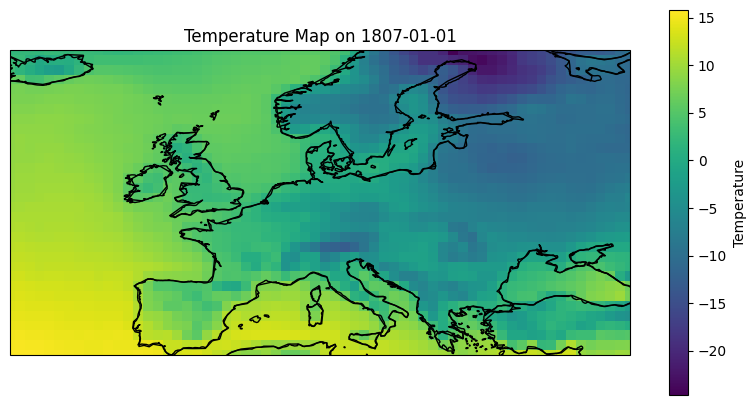

In [7]:
# Selecting the temperature data for the first day
first_day = ds.isel(time=0)

# Plotting the temperature data
plt.figure(figsize=(10, 5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
plt.pcolormesh(first_day.lon, first_day.lat, first_day['t2m'], shading='auto', transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.set_extent((BASE_LON_START, BASE_LON_END, BASE_LAT_START,  BASE_LAT_END), crs=ccrs.PlateCarree())
plt.colorbar(label='Temperature')
plt.title("Temperature Map on 1807-01-01")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

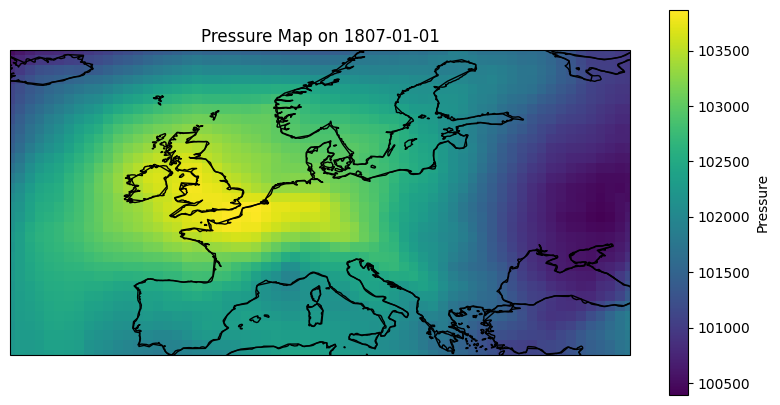

In [8]:
# Selecting the temperature data for the first day
first_day = ds.isel(time=0)

# Plotting the temperature data
plt.figure(figsize=(10, 5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
plt.pcolormesh(first_day.lon, first_day.lat, first_day['slp'], shading='auto', transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.set_extent((BASE_LON_START, BASE_LON_END, BASE_LAT_START,  BASE_LAT_END), crs=ccrs.PlateCarree())


plt.colorbar(label='Pressure')
plt.title("Pressure Map on 1807-01-01")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()